In [90]:
import requests
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import graphing


from datetime import datetime

from mpl_toolkits import mplot3d
import statsmodels.formula.api as smf
import missingno as msno


# from microsoft_custom_linear_regressor import MicrosoftCustomLinearRegressor
# from m0b_optimizer import MyOptimizer

## **data errors**
### Errors in data are a fact of life, and we can group them in two categories, **measurement errors** and **data entry errors**.



In [9]:
# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py

--2024-12-17 15:50:07--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: 'titanic.csv.3'

     0K .......... .......... .......... .......... .......... 83% 2,04M 0s
    50K .........                                             100% 4,13M=0,03s

2024-12-17 15:50:07 (2,23 MB/s) - 'titanic.csv.3' saved [61194/61194]

--2024-12-17 15:50:07--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githu

In [10]:
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
missing_data = dataset.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})
missing_data

,Empty Cells
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<AxesSubplot:>

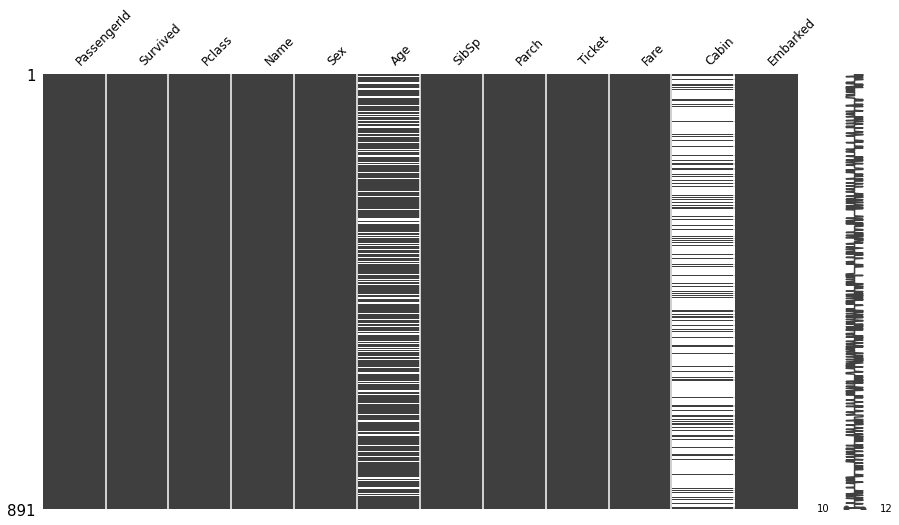

In [12]:
# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(15,8), fontsize=12)

In [13]:
unknown_age = dataset[dataset["Age"].isnull()]
unknown_age.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [18]:
# Find those passengers with missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those passengers missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))
print("Number of passengers missing age information:", missing_age.sum())
print("Number of passengers missing cabin information:", missing_cabin.sum())

Number of passengers missing age and cabin information: 158
Number of passengers missing age information: 177
Number of passengers missing cabin information: 687


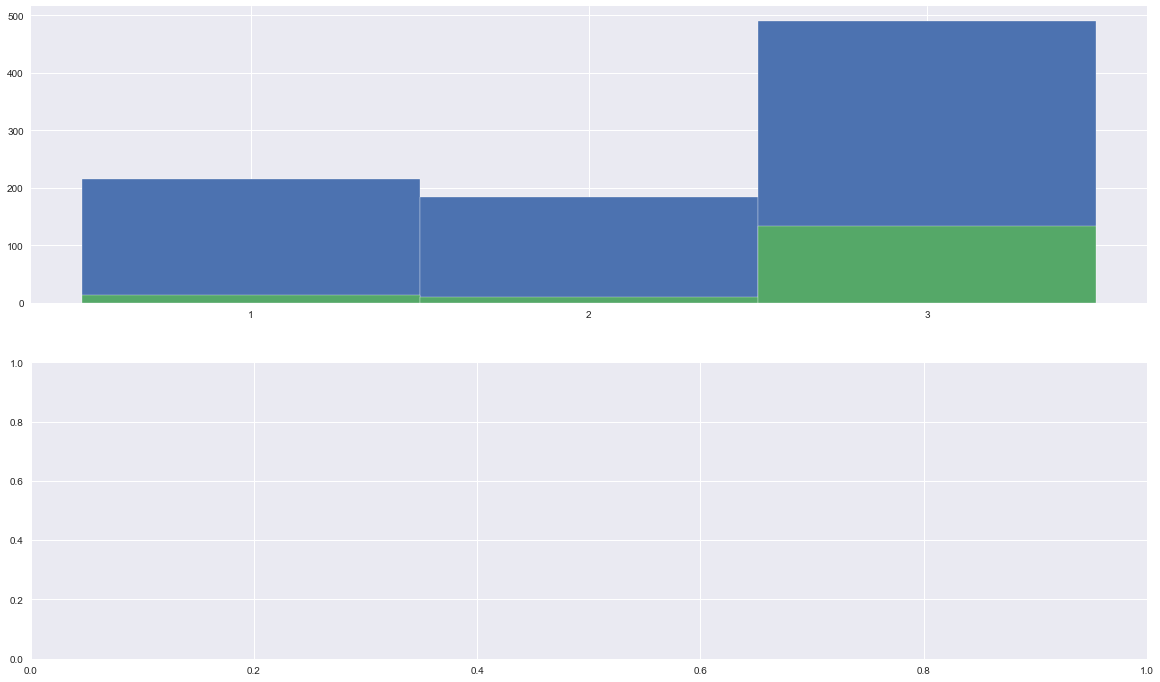

In [32]:
plt.style.use('seaborn')
fig, axs = plt.subplot_mosaic(
    [
    ['1'],
    ['2'],
    ],
    figsize = (20,12))
# axs['1'].xticks([1, 2, 3])
axs['1'].hist(dataset["Pclass"], bins=[0.5, 1.5, 2.5, 3.5], edgecolor="white")
axs['1'].hist((unknown_age_and_cabin["Pclass"]), bins=[0.5, 1.5, 2.5, 3.5], edgecolor="white")
axs['1'].set_xticks([1, 2, 3])






In [42]:
print(f'missing Class 3: {len(unknown_age_and_cabin.loc[unknown_age_and_cabin["Pclass"] == 3])}')
print(f'missing Class 2: {len(unknown_age_and_cabin.loc[unknown_age_and_cabin["Pclass"] == 2])}')
print(f'missing Class 1: {len(unknown_age_and_cabin.loc[unknown_age_and_cabin["Pclass"] == 1])}')

missing Class 3: 134
missing Class 2: 10
missing Class 1: 14


It seems that those passengers with missing information typically used the cheaper tickets. These sorts of biases might cause problems in real-world analyses.

## Missing as Zero

Additionally, some datasets may have missing values that appear as zero. While the Titanic dataset doesn't have this problem, let's see how that would work here.

In [44]:
# Print out the average age of passengers for whom we have age data
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now, make another model where missing ages contained a '0'
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


#### Another fast way to get a feel for a dataset is to graph its distribution:

(0.0, 20.0)

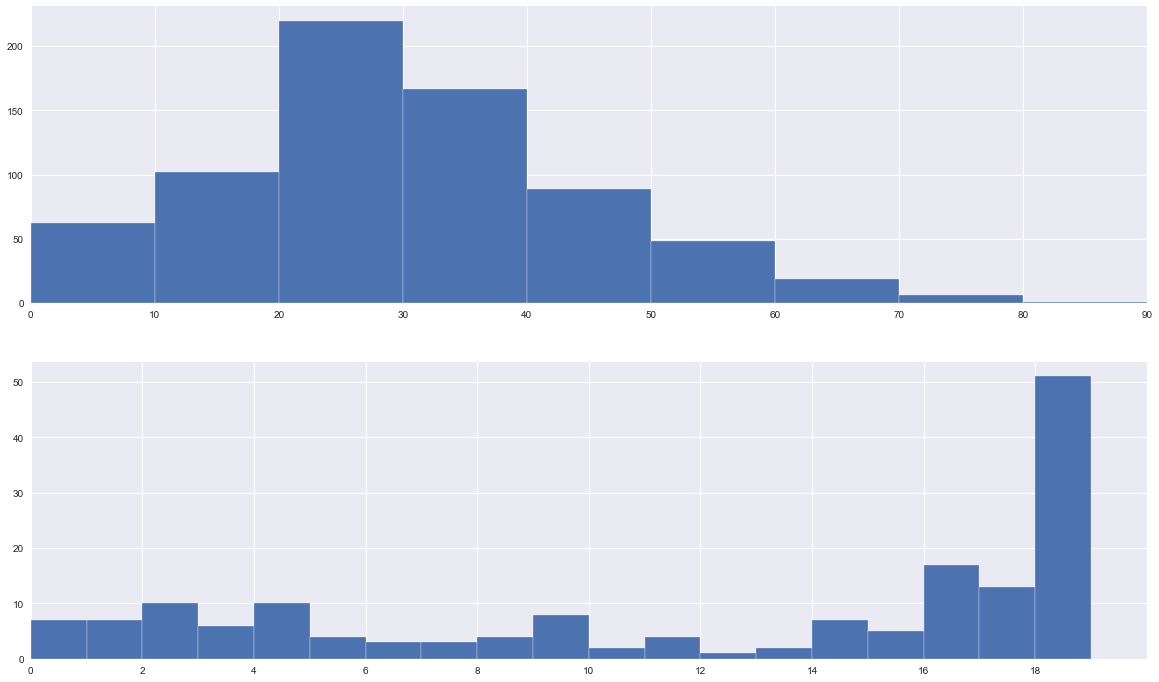

In [70]:
# the bins are also changing the plot and not only the labels
# but the ticks are only labels
fig, axs = plt.subplot_mosaic(
    [["1"], 
     ["2"]],
    figsize=(20, 12)
)

axs["1"].hist(dataset["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],edgecolor="white")
axs["1"].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
axs["1"].set_xlim([0, 90])

axs["2"].hist(dataset["Age"], bins=np.arange(0, 20, 1),edgecolor="white")
# ticks are only labels but they position according to their number
axs["2"].set_xticks(np.arange(0, 20, 2))
axs["2"].set_xlim([0, 20])



## handling missing values

### jusst dropping some values


In [75]:
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"]).reset_index(drop=True)

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)


The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


### perform imputing of some values

In [82]:
mean_age_m = clean_dataset.loc[clean_dataset["Sex"] == "male"]["Age"].mean()
mean_age_f = clean_dataset.loc[clean_dataset["Sex"] == "female"]["Age"].mean()

print(f'mean age men: {clean_dataset.loc[clean_dataset["Sex"] == "male"]["Age"].mean()}')
print(f'mean age women: {clean_dataset.loc[clean_dataset["Sex"] == "female"]["Age"].mean()}')

mean age men: 30.72664459161148
mean age women: 27.745173745173744


In [86]:
# Replace empty values in "Age" for men and woman with the mean calculated above
# clean_dataset.loc[clean_dataset["Sex"] == "male", "Age"] = clean_dataset.loc[clean_dataset["Sex"] == "male", "Age"].fillna(mean_age_m)
# clean_dataset.loc[clean_dataset["Sex"] == "female", "Age"] = clean_dataset.loc[clean_dataset["Sex"] == "female", "Age"].fillna(mean_age_m)

clean_dataset["Age"] = np.where(
    clean_dataset["Sex"] == "male",
    clean_dataset["Age"].fillna(mean_age_m),
    clean_dataset["Age"].fillna(mean_age_f)
)

print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


### Option 3: Assign a new category to unknown categorical data

The `Cabin` field is a categorical field because the Titanic cabins have a finite number of possible options. Unfortunately, many records have no cabin listed.

For this exercise, it makes perfect sense to create an `Unknown` category, and assign it to the cases where the cabin is unknown:

In [87]:
# Assign unknown to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


# Continuous, ordinal, and categorical data


### **Continuous data** 
##### refers to numerical information that can increase or decrease by any amount. For example, you can add one millimeter to one meter, and calculate a sum as 1.001 meters.

### **Categorical data** 
##### refers to data that doesn't fall on a continuous spectrum. In our scenario, the data categorizes the people on the Titanic as crew or passengers. Categorical data can't be stored as numbers in a clearly obvious way.
#### IDs refer to a special type of categorical data where each sample has its own unique ID. For example, each person in our dataset on the Titanic has a given ID value, even if that person has the same name as someone else. Identity values help us navigate in a dataset, but our data analysis doesn't directly involve those values.

### **Ordinal data** 
##### refers to categorical data that has a defined order, and can therefore support storage as numerical values. 
##### For example, we can define values of big, medium, and small as ordinal data because we can numerically rank them big > medium > small. 

##### Ordinal data can also refer to numbers that can increase or decrease, **but only by set amounts**. For example, the number of people boarding a boat is guaranteed to be a whole number as no one can half board.

##### Educational rankings would include letter grades (A, B, C, D, F) or degree levels (Associate's, Bachelor's, Master's, Doctorate). These clearly show an order but don't have consistent intervals between levels.

##### Customer satisfaction surveys often use ordinal scales like "Very Dissatisfied, Dissatisfied, Neutral, Satisfied, Very Satisfied" or ratings from 1-5 stars. While these show clear ordering, we can't say the difference between 4 and 5 stars is the same as between 2 and 3 stars.

##### In medical settings, pain scales (1-10) or disease stages (Stage I, II, III, IV) are ordinal. A pain level of 8 isn't necessarily twice as painful as 4, but it's definitely worse.

##### Socioeconomic classifications like "Lower Class, Middle Class, Upper Class" or military ranks (Private, Corporal, Sergeant, etc.) are also ordinal - they have a clear hierarchy but no fixed intervals between levels.

##### Even common phrases like "never, sometimes, often, always" represent ordinal data - they show frequency in order but don't have equal spacing between categories.



## Datatypes
- Integers: counting numbers like 2.
- Floating-point numbers: numbers with decimal places like 2.43.
- Strings: letters and words.
- Booleans: true and false.
- None, void, or null: not data, but rather the absence of data.

## Derived datatypes
As we use technology, we encounter many more basic and primitive datatypes beyond the above list. Computers can store dates, images, 3D models, and so on. We refer to these as **derived datatypes**. 

Often in machine learning, it helps to convert **derived types into simpler representations**. For example, we can store a defined date value like **1st January, 2017** as an integer or floating point number such as **20170101**. Integer or floating point numbers make the calculations behind our models easier.

## Its titanic again

In [89]:
dataset.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   


## Visualising Ordinal Data

Let's visualize some ordinal data. We have available:

1. `Pclass`: The ticket class
2. `Parch`: The number of parents or children on the ship
3. `sibsp`: The number of siblings or spouses on the ship

In [91]:
graphing.histogram(dataset, label_x='Pclass', label_y='Survived', histfunc='avg', include_boxplot=True)
